In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Objective: Build a model to predict the State of a Kickstarter project, which can be one of five classes: "Failed," "Successful," "Canceled," "Live," or "Suspended."

### Step 1: Data Collection and Understanding

In [2]:
df = pd.read_csv('../data/kickstarter_projects.csv')

In [3]:
print(df.shape)
print(df.info())

(374853, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB
None


In [11]:
df.columns = df.columns.str.lower()
df.head()

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [12]:
print(round(df['state'].value_counts(normalize=True) * 100, 2))

state
Failed        52.72
Successful    35.71
Canceled      10.34
Live           0.75
Suspended      0.49
Name: proportion, dtype: float64


In [21]:
# Filter for Successful and Failed only
df_binary = df[df['state'].isin(['Successful', 'Failed'])]
print(df_binary.shape)
print(round(df_binary['state'].value_counts(normalize=True) * 100, 2))


(331462, 11)
state
Failed        59.62
Successful    40.38
Name: proportion, dtype: float64


In [22]:
df_binary.to_csv('../data/kickstarter_filtered.csv', index=False)

# Reload from CSV
data = pd.read_csv('../data/kickstarter_filtered.csv')
print(data.shape)
print(round(data['state'].value_counts(normalize=True) * 100, 2))

(331462, 11)
state
Failed        59.62
Successful    40.38
Name: proportion, dtype: float64


### Step 2: Exploratory Data Analysis (EDA)

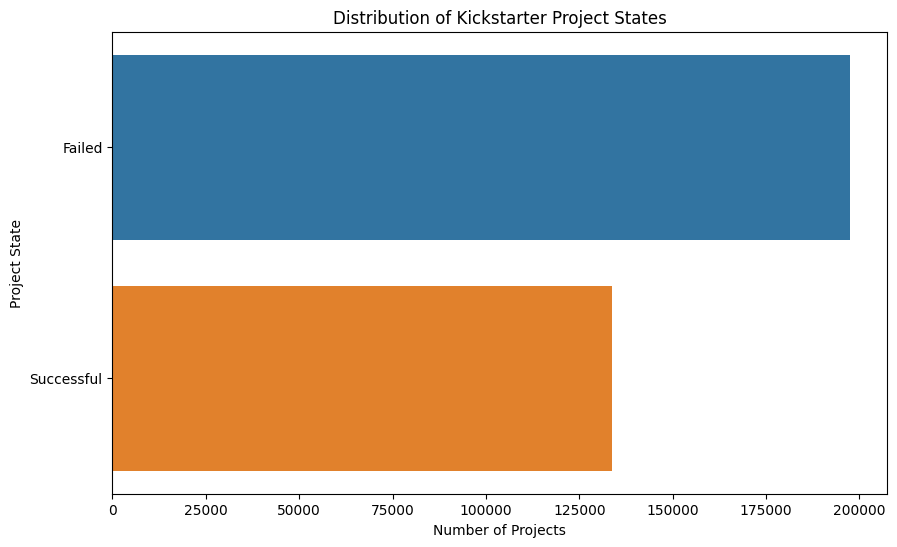

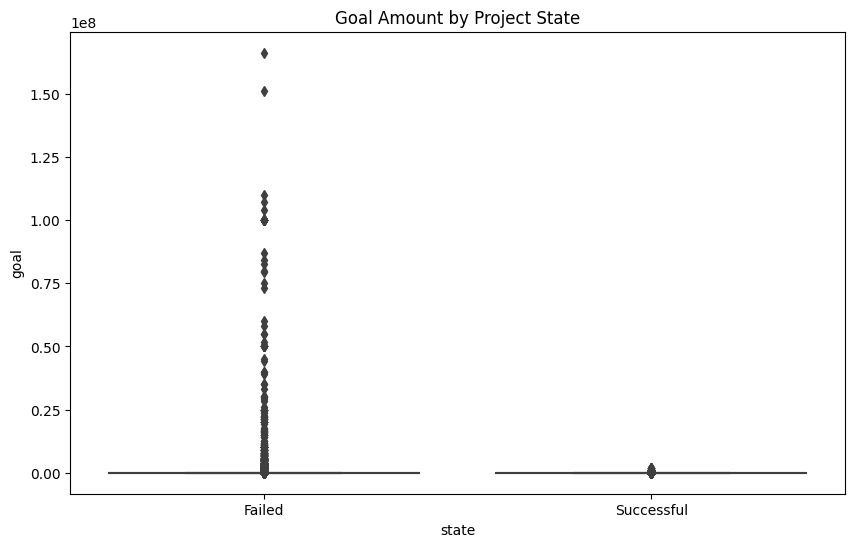

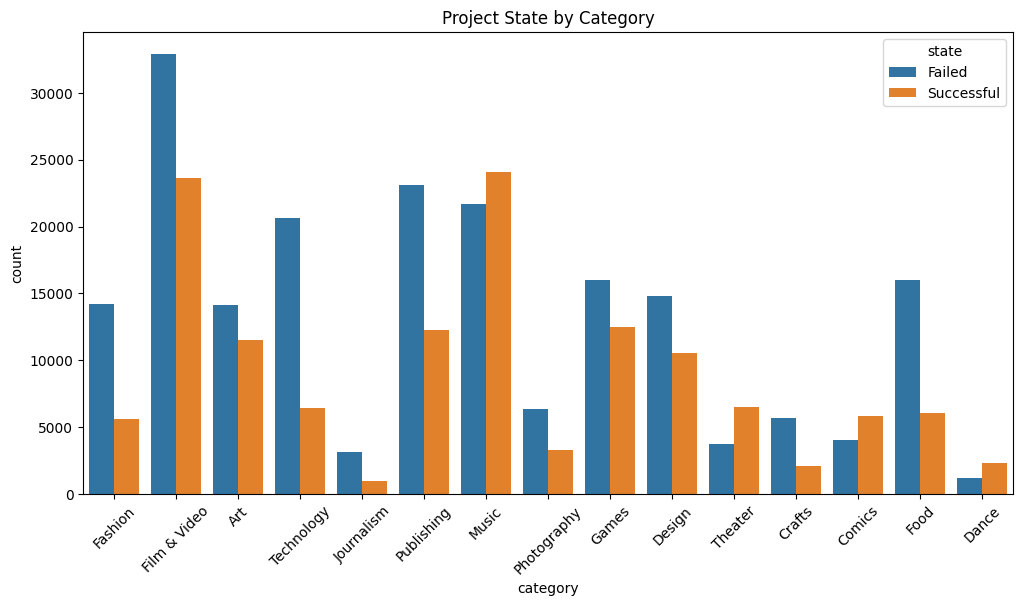

In [24]:
# 1. State distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=data['state'].value_counts(), y=data['state'].value_counts().index)
plt.title('Distribution of Kickstarter Project States')
plt.xlabel('Number of Projects')
plt.ylabel('Project State')
plt.show()


# 2. Goal by State
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='goal', data=data)
plt.title('Goal Amount by Project State')
plt.show()

# 3. Category vs State
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='state', data=data)
plt.title('Project State by Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data['duration'] = (data['deadline'] - data['launched']).dt.days

print(round(data['duration'].describe(),2))

count    331462.00
mean         32.96
std          12.71
min           0.00
25%          29.00
50%          29.00
75%          35.00
max          91.00
Name: duration, dtype: float64


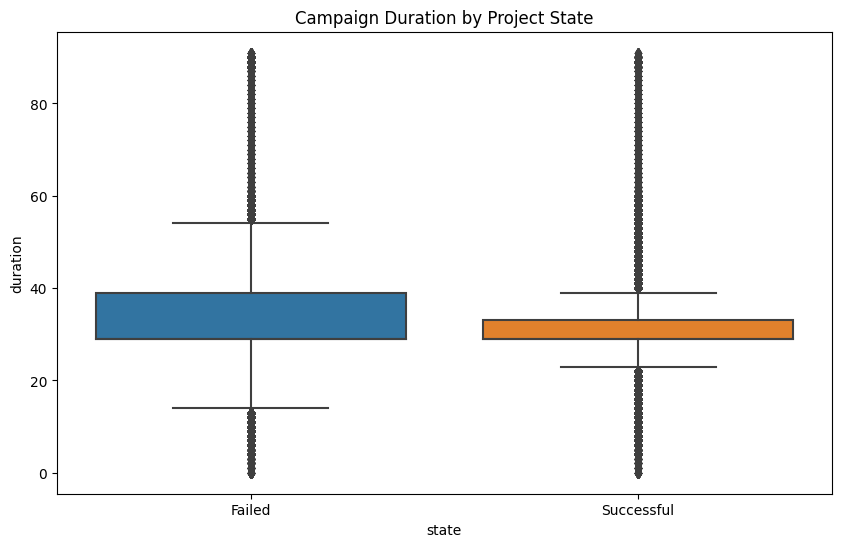

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='duration', data=data)
plt.title('Campaign Duration by Project State')
plt.show()

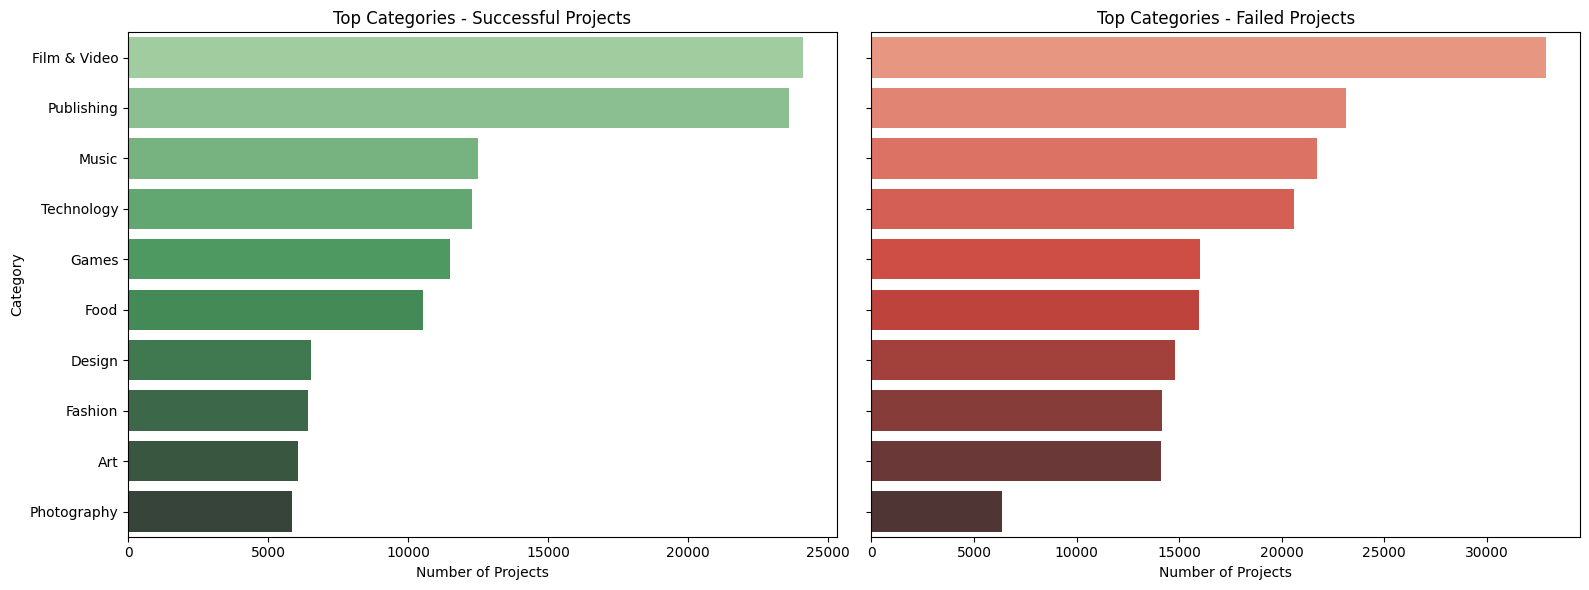

In [17]:
# Plot top categories for successful and failed projects
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Top categories for successful
success = df[df['State'] == 'Successful']['Category'].value_counts().head(10)
sns.barplot(y=success.index, x=success.values, ax=axes[0], palette='Greens_d')
axes[0].set_title('Top Categories - Successful Projects')
axes[0].set_xlabel('Number of Projects')
axes[0].set_ylabel('Category')

# Top categories for failed
failed = df[df['State'] == 'Failed']['Category'].value_counts().head(10)
sns.barplot(y=failed.index, x=failed.values, ax=axes[1], palette='Reds_d')
axes[1].set_title('Top Categories - Failed Projects')
axes[1].set_xlabel('Number of Projects')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()
